In [1]:
%matplotlib inline

from IPython.display import display as d
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(4,4)})
sns.set_style("white")
import glob
import json
import os
import sys
import shutil

def save_fig(ax, title="", pdfname="plot.pdf"):
    if title != "":
        ax.set_title(title)
    ax.get_figure().savefig(pdfname, bbox_inches="tight")
    

In [2]:
metrics = []

In [3]:
dclick = pd.read_csv("../evaluation_image_appeal_test_1/stats_clickworker.csv")
dclick["filename"] = dclick["filename"].apply(lambda x: x.replace("static/images/", ""))
d(dclick.head())

,filename,std,ci,mos,num_ratings,count_1,count_2,count_3,count_4,count_5
0,500px_cc0/medium/100327907_some_days_in_winter...,1.092398,0.450920,2.880000,25,4,3,11,6,1
1,500px_cc0/medium/1003502191_Flat_lay_of_busine...,1.099766,0.475575,2.869565,23,2,7,8,4,2
2,500px_cc0/medium/1011015162_Anemone-.jpg,0.978093,0.403737,2.960000,25,1,7,11,4,2
3,500px_cc0/medium/1011015165_Anemone-.jpg,1.144703,0.427439,2.000000,30,14,6,7,2,1
4,500px_cc0/medium/1011015217_Anemone-.jpg,0.888523,0.415842,2.500000,20,2,9,6,3,0


In [4]:
dtui = pd.read_csv("../evaluation_image_appeal_test_1/stats_tuil.csv")
dtui["filename"] = dtui["filename"].apply(lambda x: x.replace("static/images/", ""))
d(dtui.head())

,filename,std,ci,mos,num_ratings,count_1,count_2,count_3,count_4,count_5
0,500px_cc0/medium/100327907_some_days_in_winter...,0.832971,0.351733,2.208333,24,3,16,2,3,0
1,500px_cc0/medium/1003502191_Flat_lay_of_busine...,1.325393,0.547095,3.440000,25,3,2,8,5,7
2,500px_cc0/medium/1011015162_Anemone-.jpg,1.268143,0.611225,2.947368,19,2,6,5,3,3
3,500px_cc0/medium/1011015165_Anemone-.jpg,0.746101,0.307975,1.840000,25,9,11,5,0,0
4,500px_cc0/medium/1011015217_Anemone-.jpg,1.288786,0.509827,2.259259,27,10,7,5,3,2


In [5]:
dniqe = pd.read_json("niqe.json")
dniqe["image"] = dniqe["image"].apply(lambda x: x.replace("/images/", "/medium/"))
d(dniqe.head())

,image,niqe
0,500px_cc0/medium/100327907_some_days_in_winter...,19.034374
1,500px_cc0/medium/1003502191_Flat_lay_of_busine...,19.102585
2,500px_cc0/medium/1011015162_Anemone-.jpg,20.487450
3,500px_cc0/medium/1011015165_Anemone-.jpg,20.384144
4,500px_cc0/medium/1011015217_Anemone-.jpg,20.465391


In [6]:
dm = pd.merge(dniqe, dclick, left_on="image", right_on="filename")
d(dm)

,image,niqe,filename,std,ci,mos,num_ratings,count_1,count_2,count_3,count_4,count_5
0,500px_cc0/medium/100327907_some_days_in_winter...,19.034374,500px_cc0/medium/100327907_some_days_in_winter...,1.092398,0.450920,2.880000,25,4,3,11,6,1
1,500px_cc0/medium/1003502191_Flat_lay_of_busine...,19.102585,500px_cc0/medium/1003502191_Flat_lay_of_busine...,1.099766,0.475575,2.869565,23,2,7,8,4,2
2,500px_cc0/medium/1011015162_Anemone-.jpg,20.487450,500px_cc0/medium/1011015162_Anemone-.jpg,0.978093,0.403737,2.960000,25,1,7,11,4,2
3,500px_cc0/medium/1011015165_Anemone-.jpg,20.384144,500px_cc0/medium/1011015165_Anemone-.jpg,1.144703,0.427439,2.000000,30,14,6,7,2,1
4,500px_cc0/medium/1011015217_Anemone-.jpg,20.465391,500px_cc0/medium/1011015217_Anemone-.jpg,0.888523,0.415842,2.500000,20,2,9,6,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1053,pixabay_first50k/medium/woman-3585065.jpg,19.671772,pixabay_first50k/medium/woman-3585065.jpg,1.105013,0.517162,3.800000,20,1,1,5,7,6
1054,pixabay_first50k/medium/woman-3895501.jpg,20.667908,pixabay_first50k/medium/woman-3895501.jpg,1.228321,0.592032,2.789474,19,3,5,6,3,2
1055,pixabay_first50k/medium/woman-5341680.jpg,20.895239,pixabay_first50k/medium/woman-5341680.jpg,1.114741,0.573147,2.352941,17,4,6,5,1,1
1056,pixabay_first50k/medium/women-1209678.jpg,19.369072,pixabay_first50k/medium/women-1209678.jpg,1.063219,0.448958,3.000000,24,2,5,10,5,2


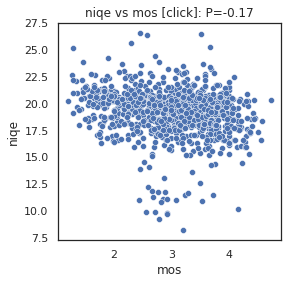

In [7]:
ax = sns.scatterplot(x="mos", y="niqe", data=dm)
p = dm[["mos", "niqe"]].corr(method="pearson")["mos"].values[1]
k = dm[["mos", "niqe"]].corr(method="kendall")["mos"].values[1]
s = dm[["mos", "niqe"]].corr(method="spearman")["mos"].values[1]
metrics.append({
    "feature": "niqe",
    "p": p,
    "k": k,
    "s": s
})
save_fig(ax, title="niqe vs mos [click]: P={}".format(p.round(2)), pdfname="niqe_vs_mos_click.pdf")

In [8]:
dnima_q = pd.read_json("nima_quality.json")
def create_filename(x):
    return list(glob.glob(x["db"] + "/medium/" + x["image_id"] + "*"))[0]

dnima_q["image"] = dnima_q.apply(create_filename, axis=1)

dnima_q = dnima_q[["image", "mean_score_prediction"]]
d(dnima_q.head())

,image,mean_score_prediction
0,pixabay_first50k/medium/still-life-art-and-lit...,5.201666
1,pixabay_first50k/medium/textures-3668419.jpg,5.092143
2,pixabay_first50k/medium/goose-3190750.jpg,5.255114
3,pixabay_first50k/medium/swan-fight-4066486.jpg,5.195546
4,pixabay_first50k/medium/el-capitan-4933472.jpg,4.831330


In [9]:
dm = pd.merge(dnima_q, dclick, left_on="image", right_on="filename")
d(dm)

,image,mean_score_prediction,filename,std,ci,mos,num_ratings,count_1,count_2,count_3,count_4,count_5
0,pixabay_first50k/medium/still-life-art-and-lit...,5.201666,pixabay_first50k/medium/still-life-art-and-lit...,1.162660,0.502772,3.521739,23,2,1,8,7,5
1,pixabay_first50k/medium/textures-3668419.jpg,5.092143,pixabay_first50k/medium/textures-3668419.jpg,1.298695,0.513747,2.925926,27,4,7,7,5,4
2,pixabay_first50k/medium/goose-3190750.jpg,5.255114,pixabay_first50k/medium/goose-3190750.jpg,1.074789,0.401333,3.500000,30,2,2,10,11,5
3,pixabay_first50k/medium/swan-fight-4066486.jpg,5.195546,pixabay_first50k/medium/swan-fight-4066486.jpg,0.936734,0.405074,3.173913,23,0,6,9,6,2
4,pixabay_first50k/medium/el-capitan-4933472.jpg,4.831330,pixabay_first50k/medium/el-capitan-4933472.jpg,1.040833,0.429635,4.000000,25,0,3,4,8,10
...,...,...,...,...,...,...,...,...,...,...,...,...
1053,koniq10k/medium/1289162225.jpg,4.859053,koniq10k/medium/1289162225.jpg,1.199747,0.425412,2.757576,33,6,7,12,5,3
1054,koniq10k/medium/4551121129.jpg,5.217058,koniq10k/medium/4551121129.jpg,0.797724,0.344962,3.000000,23,1,4,12,6,0
1055,koniq10k/medium/4605755313.jpg,4.330168,koniq10k/medium/4605755313.jpg,1.069268,0.441372,3.680000,25,0,4,7,7,7
1056,koniq10k/medium/4034220859.jpg,5.058482,koniq10k/medium/4034220859.jpg,1.167077,0.435794,2.500000,30,8,6,10,5,1


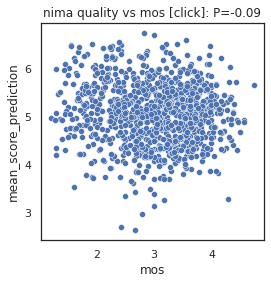

In [10]:
ax = sns.scatterplot(x="mos", y="mean_score_prediction", data=dm)
p = dm[["mos", "mean_score_prediction"]].corr(method="pearson")["mos"].values[1]
k = dm[["mos", "mean_score_prediction"]].corr(method="kendall")["mos"].values[1]
s = dm[["mos", "mean_score_prediction"]].corr(method="spearman")["mos"].values[1]
metrics.append({
    "feature": "nima_q",
    "p": p,
    "k": k,
    "s": s
})
save_fig(ax, title="nima quality vs mos [click]: P={}".format(p.round(2)), pdfname="nima_q_vs_mos_click.pdf")

In [11]:
dnima_a = pd.read_json("nima_appeal.json")
def create_filename(x):
    return list(glob.glob(x["db"] + "/medium/" + x["image_id"] + "*"))[0]

dnima_a["image"] = dnima_a.apply(create_filename, axis=1)

dnima_a = dnima_a[["image", "mean_score_prediction"]]
d(dnima_a.head())

,image,mean_score_prediction
0,koniq10k/medium/8385411442.jpg,5.756817
1,koniq10k/medium/9625138420.jpg,5.281550
2,koniq10k/medium/2713735764.jpg,4.877974
3,koniq10k/medium/11232665444.jpg,5.413231
4,koniq10k/medium/5409637634.jpg,5.244328


In [12]:
dm = pd.merge(dnima_a, dclick, left_on="image", right_on="filename")
d(dm)

,image,mean_score_prediction,filename,std,ci,mos,num_ratings,count_1,count_2,count_3,count_4,count_5
0,koniq10k/medium/8385411442.jpg,5.756817,koniq10k/medium/8385411442.jpg,1.288944,0.499800,3.428571,28,3,4,5,10,6
1,koniq10k/medium/9625138420.jpg,5.281550,koniq10k/medium/9625138420.jpg,0.938903,0.379231,4.192308,26,0,2,3,9,12
2,koniq10k/medium/2713735764.jpg,4.877974,koniq10k/medium/2713735764.jpg,1.056297,0.401794,2.482759,29,6,9,8,6,0
3,koniq10k/medium/11232665444.jpg,5.413231,koniq10k/medium/11232665444.jpg,0.811177,0.359656,3.090909,22,0,5,11,5,1
4,koniq10k/medium/5409637634.jpg,5.244328,koniq10k/medium/5409637634.jpg,0.848528,0.342728,4.000000,26,0,2,3,14,7
...,...,...,...,...,...,...,...,...,...,...,...,...
1053,own/medium/IMG_5150.jpg,5.124315,own/medium/IMG_5150.jpg,0.858395,0.401741,2.000000,20,7,6,7,0,0
1054,own/medium/IMG_1665.jpg,5.375199,own/medium/IMG_1665.jpg,1.127494,0.560689,3.277778,18,1,3,7,4,3
1055,own/medium/IMG_20170907_182814017.jpg,5.741079,own/medium/IMG_20170907_182814017.jpg,0.982052,0.424671,2.652174,23,3,6,11,2,1
1056,own/medium/IMG_4558.jpg,4.840841,own/medium/IMG_4558.jpg,0.917208,0.355656,2.785714,28,2,8,13,4,1


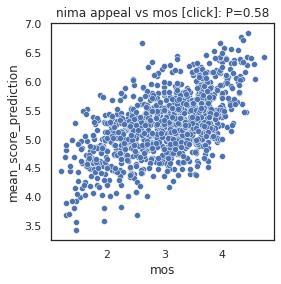

In [13]:
ax = sns.scatterplot(x="mos", y="mean_score_prediction", data=dm)
p = dm[["mos", "mean_score_prediction"]].corr(method="pearson")["mos"].values[1]
k = dm[["mos", "mean_score_prediction"]].corr(method="kendall")["mos"].values[1]
s = dm[["mos", "mean_score_prediction"]].corr(method="spearman")["mos"].values[1]
metrics.append({
    "feature": "nima_a",
    "p": p,
    "k": k,
    "s": s
})
save_fig(ax, title="nima appeal vs mos [click]: P={}".format(p.round(2)), pdfname="nima_a_vs_mos_click.pdf")

In [14]:
# saliency pedictions

ddeep = pd.read_json("../saliency_maps/deepgaze_II.json")

def get_filename(x):
    x = x.replace("deepgaze_II/", "")
    x = x.split("/", 1)[0] + "/medium/" + x.split("/", 1)[1]
    return x.replace(".png", ".jpg")
    
ddeep["filename"] = ddeep["image"].apply(get_filename)

d(ddeep)

,connected_components,image,mean_saliency,std_saliency,filename
0,3,deepgaze_II/500px_cc0/100327907_some_days_in_w...,0.018443,0.134547,500px_cc0/medium/100327907_some_days_in_winter...
1,2,deepgaze_II/500px_cc0/1003502191_Flat_lay_of_b...,0.001710,0.041320,500px_cc0/medium/1003502191_Flat_lay_of_busine...
2,2,deepgaze_II/500px_cc0/1011015162_Anemone-.png,0.017187,0.129970,500px_cc0/medium/1011015162_Anemone-.jpg
3,2,deepgaze_II/500px_cc0/1011015165_Anemone-.png,0.002757,0.052438,500px_cc0/medium/1011015165_Anemone-.jpg
4,2,deepgaze_II/500px_cc0/1011015217_Anemone-.png,0.004940,0.070113,500px_cc0/medium/1011015217_Anemone-.jpg
...,...,...,...,...,...
1024,2,deepgaze_II/pixabay_first50k/woman-3585065.png,0.002280,0.047694,pixabay_first50k/medium/woman-3585065.jpg
1025,2,deepgaze_II/pixabay_first50k/woman-3895501.png,0.007009,0.083425,pixabay_first50k/medium/woman-3895501.jpg
1026,4,deepgaze_II/pixabay_first50k/woman-5341680.png,0.007843,0.088213,pixabay_first50k/medium/woman-5341680.jpg
1027,2,deepgaze_II/pixabay_first50k/women-1209678.png,0.002543,0.050365,pixabay_first50k/medium/women-1209678.jpg


In [15]:
dm = pd.merge(ddeep, dclick, left_on="filename", right_on="filename")
d(dm)

,connected_components,image,mean_saliency,std_saliency,filename,std,ci,mos,num_ratings,count_1,count_2,count_3,count_4,count_5
0,3,deepgaze_II/500px_cc0/100327907_some_days_in_w...,0.018443,0.134547,500px_cc0/medium/100327907_some_days_in_winter...,1.092398,0.450920,2.880000,25,4,3,11,6,1
1,2,deepgaze_II/500px_cc0/1003502191_Flat_lay_of_b...,0.001710,0.041320,500px_cc0/medium/1003502191_Flat_lay_of_busine...,1.099766,0.475575,2.869565,23,2,7,8,4,2
2,2,deepgaze_II/500px_cc0/1011015162_Anemone-.png,0.017187,0.129970,500px_cc0/medium/1011015162_Anemone-.jpg,0.978093,0.403737,2.960000,25,1,7,11,4,2
3,2,deepgaze_II/500px_cc0/1011015165_Anemone-.png,0.002757,0.052438,500px_cc0/medium/1011015165_Anemone-.jpg,1.144703,0.427439,2.000000,30,14,6,7,2,1
4,2,deepgaze_II/500px_cc0/1011015217_Anemone-.png,0.004940,0.070113,500px_cc0/medium/1011015217_Anemone-.jpg,0.888523,0.415842,2.500000,20,2,9,6,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,2,deepgaze_II/pixabay_first50k/woman-3585065.png,0.002280,0.047694,pixabay_first50k/medium/woman-3585065.jpg,1.105013,0.517162,3.800000,20,1,1,5,7,6
1019,2,deepgaze_II/pixabay_first50k/woman-3895501.png,0.007009,0.083425,pixabay_first50k/medium/woman-3895501.jpg,1.228321,0.592032,2.789474,19,3,5,6,3,2
1020,4,deepgaze_II/pixabay_first50k/woman-5341680.png,0.007843,0.088213,pixabay_first50k/medium/woman-5341680.jpg,1.114741,0.573147,2.352941,17,4,6,5,1,1
1021,2,deepgaze_II/pixabay_first50k/women-1209678.png,0.002543,0.050365,pixabay_first50k/medium/women-1209678.jpg,1.063219,0.448958,3.000000,24,2,5,10,5,2


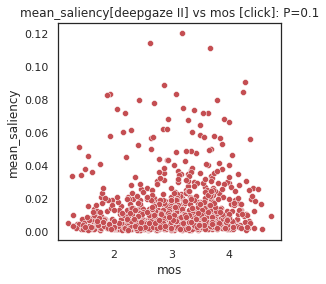

In [16]:
ax = sns.scatterplot(x="mos", y="mean_saliency", data=dm, color="r")
p = dm[["mos", "mean_saliency"]].corr(method="pearson")["mos"].values[1]
k = dm[["mos", "mean_saliency"]].corr(method="kendall")["mos"].values[1]
s = dm[["mos", "mean_saliency"]].corr(method="spearman")["mos"].values[1]
metrics.append({
    "feature": "mean_saliency_deepgaze",
    "p": p,
    "k": k,
    "s": s
})
save_fig(ax, title="mean_saliency[deepgaze II] vs mos [click]: P={}".format(p.round(2)), pdfname="mean_saliency_deepgaze_vs_mos_click.pdf")

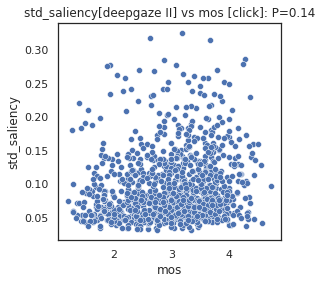

In [17]:
ax = sns.scatterplot(x="mos", y="std_saliency", data=dm, color="b")
p = dm[["mos", "std_saliency"]].corr(method="pearson")["mos"].values[1]
k = dm[["mos", "std_saliency"]].corr(method="kendall")["mos"].values[1]
s = dm[["mos", "std_saliency"]].corr(method="spearman")["mos"].values[1]
metrics.append({
    "feature": "std_saliency_deepgaze",
    "p": p,
    "k": k,
    "s": s
})
save_fig(ax, title="std_saliency[deepgaze II] vs mos [click]: P={}".format(p.round(2)), pdfname="std_saliency_deepgaze_vs_mos_click.pdf")

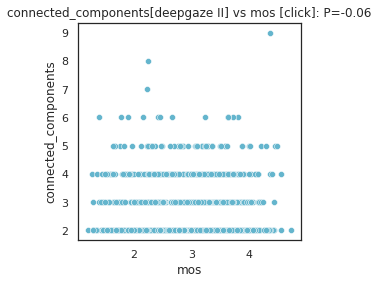

In [18]:
ax = sns.scatterplot(x="mos", y="connected_components", data=dm, color="c")
p = dm[["mos", "connected_components"]].corr(method="pearson")["mos"].values[1]
k = dm[["mos", "connected_components"]].corr(method="kendall")["mos"].values[1]
s = dm[["mos", "connected_components"]].corr(method="spearman")["mos"].values[1]
metrics.append({
    "feature": "connected_components_deepgaze",
    "p": p,
    "k": k,
    "s": s
})
save_fig(ax, title="connected_components[deepgaze II] vs mos [click]: P={}".format(p.round(2)), pdfname="connected_components_deepgaze_vs_mos_click.pdf")

In [19]:
dunisal = pd.read_json("../saliency_maps/unisal.json")

def get_filename(x):
    x = x.replace("unisal/", "")
    x = x.split("/", 1)[0] + "/medium/" + x.split("/", 1)[1]
    return x.replace(".png", ".jpg")
    
dunisal["filename"] = dunisal["image"].apply(get_filename)

d(dunisal)

,connected_components,image,mean_saliency,std_saliency,filename
0,73,unisal/500px_cc0/100327907_some_days_in_winter...,0.160042,0.366645,500px_cc0/medium/100327907_some_days_in_winter...
1,2,unisal/500px_cc0/1003502191_Flat_lay_of_busine...,0.006744,0.081845,500px_cc0/medium/1003502191_Flat_lay_of_busine...
2,18,unisal/500px_cc0/1011015162_Anemone-.jpg,0.023652,0.151962,500px_cc0/medium/1011015162_Anemone-.jpg
3,2,unisal/500px_cc0/1011015165_Anemone-.jpg,0.008461,0.091594,500px_cc0/medium/1011015165_Anemone-.jpg
4,14,unisal/500px_cc0/1011015217_Anemone-.jpg,0.021157,0.143909,500px_cc0/medium/1011015217_Anemone-.jpg
...,...,...,...,...,...
1056,2,unisal/pixabay_first50k/woman-3585065.jpg,0.007547,0.086543,pixabay_first50k/medium/woman-3585065.jpg
1057,3,unisal/pixabay_first50k/woman-3895501.jpg,0.045009,0.207325,pixabay_first50k/medium/woman-3895501.jpg
1058,3,unisal/pixabay_first50k/woman-5341680.jpg,0.015739,0.124462,pixabay_first50k/medium/woman-5341680.jpg
1059,3,unisal/pixabay_first50k/women-1209678.jpg,0.016106,0.125883,pixabay_first50k/medium/women-1209678.jpg


In [20]:
dm = pd.merge(dunisal, dclick, left_on="filename", right_on="filename")
d(dm)

,connected_components,image,mean_saliency,std_saliency,filename,std,ci,mos,num_ratings,count_1,count_2,count_3,count_4,count_5
0,73,unisal/500px_cc0/100327907_some_days_in_winter...,0.160042,0.366645,500px_cc0/medium/100327907_some_days_in_winter...,1.092398,0.450920,2.880000,25,4,3,11,6,1
1,2,unisal/500px_cc0/1003502191_Flat_lay_of_busine...,0.006744,0.081845,500px_cc0/medium/1003502191_Flat_lay_of_busine...,1.099766,0.475575,2.869565,23,2,7,8,4,2
2,18,unisal/500px_cc0/1011015162_Anemone-.jpg,0.023652,0.151962,500px_cc0/medium/1011015162_Anemone-.jpg,0.978093,0.403737,2.960000,25,1,7,11,4,2
3,2,unisal/500px_cc0/1011015165_Anemone-.jpg,0.008461,0.091594,500px_cc0/medium/1011015165_Anemone-.jpg,1.144703,0.427439,2.000000,30,14,6,7,2,1
4,14,unisal/500px_cc0/1011015217_Anemone-.jpg,0.021157,0.143909,500px_cc0/medium/1011015217_Anemone-.jpg,0.888523,0.415842,2.500000,20,2,9,6,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050,2,unisal/pixabay_first50k/woman-3585065.jpg,0.007547,0.086543,pixabay_first50k/medium/woman-3585065.jpg,1.105013,0.517162,3.800000,20,1,1,5,7,6
1051,3,unisal/pixabay_first50k/woman-3895501.jpg,0.045009,0.207325,pixabay_first50k/medium/woman-3895501.jpg,1.228321,0.592032,2.789474,19,3,5,6,3,2
1052,3,unisal/pixabay_first50k/woman-5341680.jpg,0.015739,0.124462,pixabay_first50k/medium/woman-5341680.jpg,1.114741,0.573147,2.352941,17,4,6,5,1,1
1053,3,unisal/pixabay_first50k/women-1209678.jpg,0.016106,0.125883,pixabay_first50k/medium/women-1209678.jpg,1.063219,0.448958,3.000000,24,2,5,10,5,2


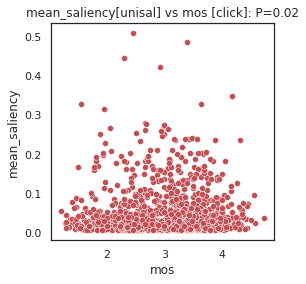

In [21]:
ax = sns.scatterplot(x="mos", y="mean_saliency", data=dm, color="r")
p = dm[["mos", "mean_saliency"]].corr(method="pearson")["mos"].values[1]
k = dm[["mos", "mean_saliency"]].corr(method="kendall")["mos"].values[1]
s = dm[["mos", "mean_saliency"]].corr(method="spearman")["mos"].values[1]
metrics.append({
    "feature": "mean_saliency_unisal",
    "p": p,
    "k": k,
    "s": s
})
save_fig(ax, title="mean_saliency[unisal] vs mos [click]: P={}".format(p.round(2)), pdfname="mean_saliency_unisal_vs_mos_click.pdf")

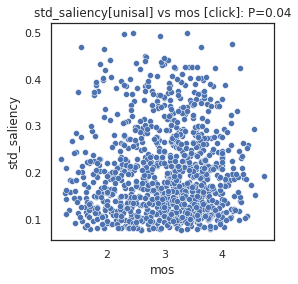

In [22]:
ax = sns.scatterplot(x="mos", y="std_saliency", data=dm, color="b")
p = dm[["mos", "std_saliency"]].corr(method="pearson")["mos"].values[1]
k = dm[["mos", "std_saliency"]].corr(method="kendall")["mos"].values[1]
s = dm[["mos", "std_saliency"]].corr(method="spearman")["mos"].values[1]
metrics.append({
    "feature": "std_saliency_unisal",
    "p": p,
    "k": k,
    "s": s
})
save_fig(ax, title="std_saliency[unisal] vs mos [click]: P={}".format(p.round(2)), pdfname="std_saliency_unisal_vs_mos_click.pdf")

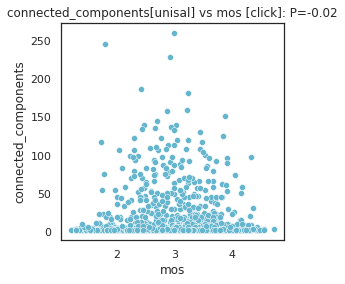

In [23]:
ax = sns.scatterplot(x="mos", y="connected_components", data=dm, color="c")
p = dm[["mos", "connected_components"]].corr(method="pearson")["mos"].values[1]
k = dm[["mos", "connected_components"]].corr(method="kendall")["mos"].values[1]
s = dm[["mos", "connected_components"]].corr(method="spearman")["mos"].values[1]
metrics.append({
    "feature": "connected_components_unisal",
    "p": p,
    "k": k,
    "s": s
})
save_fig(ax, title="connected_components[unisal] vs mos [click]: P={}".format(p.round(2)), pdfname="connected_components_unisal_vs_mos_click.pdf")

In [24]:
# depth maps
ddephts = pd.read_json("../depth_segmentation_maps/depths.json")

def get_filename(x):
    x = x.replace("depth_segmentation_maps/DPT/depths/", "")
    x = x.split("/", 1)[0] + "/medium/" + x.split("/", 1)[1]
    
    return x.replace(".png", ".jpg")
    
ddephts["filename"] = ddephts["image"].apply(get_filename)

d(ddephts)

,image,mean_depth,std_depth,filename
0,depth_segmentation_maps/DPT/depths/500px_cc0/1...,36763.688611,18154.203253,500px_cc0/medium/100327907_some_days_in_winter...
1,depth_segmentation_maps/DPT/depths/500px_cc0/1...,25372.601405,17086.128711,500px_cc0/medium/1003502191_Flat_lay_of_busine...
2,depth_segmentation_maps/DPT/depths/500px_cc0/1...,32116.281660,19412.510583,500px_cc0/medium/1011015162_Anemone-.jpg
3,depth_segmentation_maps/DPT/depths/500px_cc0/1...,34076.573541,17195.084243,500px_cc0/medium/1011015165_Anemone-.jpg
4,depth_segmentation_maps/DPT/depths/500px_cc0/1...,30410.322614,16990.384103,500px_cc0/medium/1011015217_Anemone-.jpg
...,...,...,...,...
1056,depth_segmentation_maps/DPT/depths/pixabay_fir...,26944.590945,20054.103321,pixabay_first50k/medium/woman-3585065.jpg
1057,depth_segmentation_maps/DPT/depths/pixabay_fir...,31090.973067,16984.042538,pixabay_first50k/medium/woman-3895501.jpg
1058,depth_segmentation_maps/DPT/depths/pixabay_fir...,28155.522096,18732.643078,pixabay_first50k/medium/woman-5341680.jpg
1059,depth_segmentation_maps/DPT/depths/pixabay_fir...,23825.702718,21133.509133,pixabay_first50k/medium/women-1209678.jpg


In [25]:
dm = pd.merge(ddephts, dclick, left_on="filename", right_on="filename")
d(dm)

,image,mean_depth,std_depth,filename,std,ci,mos,num_ratings,count_1,count_2,count_3,count_4,count_5
0,depth_segmentation_maps/DPT/depths/500px_cc0/1...,36763.688611,18154.203253,500px_cc0/medium/100327907_some_days_in_winter...,1.092398,0.450920,2.880000,25,4,3,11,6,1
1,depth_segmentation_maps/DPT/depths/500px_cc0/1...,25372.601405,17086.128711,500px_cc0/medium/1003502191_Flat_lay_of_busine...,1.099766,0.475575,2.869565,23,2,7,8,4,2
2,depth_segmentation_maps/DPT/depths/500px_cc0/1...,32116.281660,19412.510583,500px_cc0/medium/1011015162_Anemone-.jpg,0.978093,0.403737,2.960000,25,1,7,11,4,2
3,depth_segmentation_maps/DPT/depths/500px_cc0/1...,34076.573541,17195.084243,500px_cc0/medium/1011015165_Anemone-.jpg,1.144703,0.427439,2.000000,30,14,6,7,2,1
4,depth_segmentation_maps/DPT/depths/500px_cc0/1...,30410.322614,16990.384103,500px_cc0/medium/1011015217_Anemone-.jpg,0.888523,0.415842,2.500000,20,2,9,6,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050,depth_segmentation_maps/DPT/depths/pixabay_fir...,26944.590945,20054.103321,pixabay_first50k/medium/woman-3585065.jpg,1.105013,0.517162,3.800000,20,1,1,5,7,6
1051,depth_segmentation_maps/DPT/depths/pixabay_fir...,31090.973067,16984.042538,pixabay_first50k/medium/woman-3895501.jpg,1.228321,0.592032,2.789474,19,3,5,6,3,2
1052,depth_segmentation_maps/DPT/depths/pixabay_fir...,28155.522096,18732.643078,pixabay_first50k/medium/woman-5341680.jpg,1.114741,0.573147,2.352941,17,4,6,5,1,1
1053,depth_segmentation_maps/DPT/depths/pixabay_fir...,23825.702718,21133.509133,pixabay_first50k/medium/women-1209678.jpg,1.063219,0.448958,3.000000,24,2,5,10,5,2


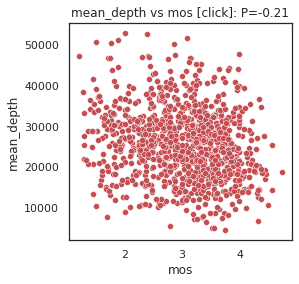

In [26]:
ax = sns.scatterplot(x="mos", y="mean_depth", data=dm, color="r")
p = dm[["mos", "mean_depth"]].corr(method="pearson")["mos"].values[1]
k = dm[["mos", "mean_depth"]].corr(method="kendall")["mos"].values[1]
s = dm[["mos", "mean_depth"]].corr(method="spearman")["mos"].values[1]
metrics.append({
    "feature": "mean_depth",
    "p": p,
    "k": k,
    "s": s
})
save_fig(ax, title="mean_depth vs mos [click]: P={}".format(p.round(2)), pdfname="mean_depth_vs_mos_click.pdf")

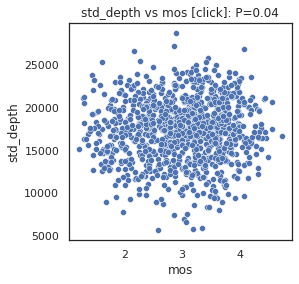

In [27]:
ax = sns.scatterplot(x="mos", y="std_depth", data=dm, color="b")
p = dm[["mos", "std_depth"]].corr(method="pearson")["mos"].values[1]
k = dm[["mos", "std_depth"]].corr(method="kendall")["mos"].values[1]
s = dm[["mos", "std_depth"]].corr(method="spearman")["mos"].values[1]
metrics.append({
    "feature": "std_depth",
    "p": p,
    "k": k,
    "s": s
})
save_fig(ax, title="std_depth vs mos [click]: P={}".format(p.round(2)), pdfname="std_depth_vs_mos_click.pdf")

In [28]:
# segmentation maps
dsegs = pd.read_json("../depth_segmentation_maps/segmentations.json")

def get_filename(x):
    x = x.replace("depth_segmentation_maps/DPT/segmentation/", "")
    x = x.replace("_mask", "")
    x = x.split("/", 1)[0] + "/medium/" + x.split("/", 1)[1]
    
    return x.replace(".png", ".jpg")
    
dsegs["filename"] = dsegs["image"].apply(get_filename)

d(dsegs)

,image,mean_segmentation,number_segmentation,std_segmentation,filename
0,depth_segmentation_maps/DPT/segmentation/500px...,2.061414,12,2.220757,500px_cc0/medium/100327907_some_days_in_winter...
1,depth_segmentation_maps/DPT/segmentation/500px...,3.278665,23,4.854167,500px_cc0/medium/1003502191_Flat_lay_of_busine...
2,depth_segmentation_maps/DPT/segmentation/500px...,0.221726,10,0.978827,500px_cc0/medium/1011015162_Anemone-.jpg
3,depth_segmentation_maps/DPT/segmentation/500px...,1.873934,14,2.239667,500px_cc0/medium/1011015165_Anemone-.jpg
4,depth_segmentation_maps/DPT/segmentation/500px...,3.643450,20,4.333476,500px_cc0/medium/1011015217_Anemone-.jpg
...,...,...,...,...,...
1057,depth_segmentation_maps/DPT/segmentation/pixab...,1.044185,11,1.968715,pixabay_first50k/medium/woman-3585065.jpg
1058,depth_segmentation_maps/DPT/segmentation/pixab...,0.779975,7,0.719633,pixabay_first50k/medium/woman-3895501.jpg
1059,depth_segmentation_maps/DPT/segmentation/pixab...,1.848201,6,1.692414,pixabay_first50k/medium/woman-5341680.jpg
1060,depth_segmentation_maps/DPT/segmentation/pixab...,1.323142,8,1.795496,pixabay_first50k/medium/women-1209678.jpg


In [29]:
dm = pd.merge(dsegs, dclick, left_on="filename", right_on="filename")
d(dm)

,image,mean_segmentation,number_segmentation,std_segmentation,filename,std,ci,mos,num_ratings,count_1,count_2,count_3,count_4,count_5
0,depth_segmentation_maps/DPT/segmentation/500px...,2.061414,12,2.220757,500px_cc0/medium/100327907_some_days_in_winter...,1.092398,0.450920,2.880000,25,4,3,11,6,1
1,depth_segmentation_maps/DPT/segmentation/500px...,3.278665,23,4.854167,500px_cc0/medium/1003502191_Flat_lay_of_busine...,1.099766,0.475575,2.869565,23,2,7,8,4,2
2,depth_segmentation_maps/DPT/segmentation/500px...,0.221726,10,0.978827,500px_cc0/medium/1011015162_Anemone-.jpg,0.978093,0.403737,2.960000,25,1,7,11,4,2
3,depth_segmentation_maps/DPT/segmentation/500px...,1.873934,14,2.239667,500px_cc0/medium/1011015165_Anemone-.jpg,1.144703,0.427439,2.000000,30,14,6,7,2,1
4,depth_segmentation_maps/DPT/segmentation/500px...,3.643450,20,4.333476,500px_cc0/medium/1011015217_Anemone-.jpg,0.888523,0.415842,2.500000,20,2,9,6,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1053,depth_segmentation_maps/DPT/segmentation/pixab...,1.044185,11,1.968715,pixabay_first50k/medium/woman-3585065.jpg,1.105013,0.517162,3.800000,20,1,1,5,7,6
1054,depth_segmentation_maps/DPT/segmentation/pixab...,0.779975,7,0.719633,pixabay_first50k/medium/woman-3895501.jpg,1.228321,0.592032,2.789474,19,3,5,6,3,2
1055,depth_segmentation_maps/DPT/segmentation/pixab...,1.848201,6,1.692414,pixabay_first50k/medium/woman-5341680.jpg,1.114741,0.573147,2.352941,17,4,6,5,1,1
1056,depth_segmentation_maps/DPT/segmentation/pixab...,1.323142,8,1.795496,pixabay_first50k/medium/women-1209678.jpg,1.063219,0.448958,3.000000,24,2,5,10,5,2


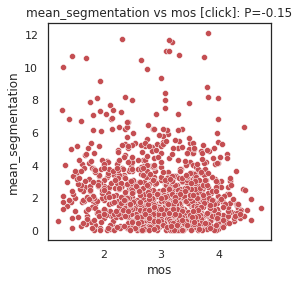

In [30]:
ax = sns.scatterplot(x="mos", y="mean_segmentation", data=dm, color="r")
p = dm[["mos", "mean_segmentation"]].corr(method="pearson")["mos"].values[1]
k = dm[["mos", "mean_segmentation"]].corr(method="kendall")["mos"].values[1]
s = dm[["mos", "mean_segmentation"]].corr(method="spearman")["mos"].values[1]
metrics.append({
    "feature": "mean_segmentation",
    "p": p,
    "k": k,
    "s": s
})
save_fig(ax, title="mean_segmentation vs mos [click]: P={}".format(p.round(2)), pdfname="mean_segmentation_vs_mos_click.pdf")

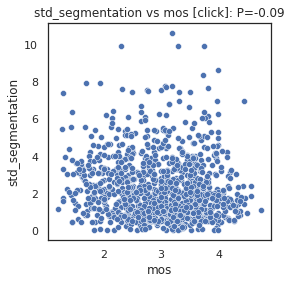

In [31]:
ax = sns.scatterplot(x="mos", y="std_segmentation", data=dm, color="b")
p = dm[["mos", "std_segmentation"]].corr(method="pearson")["mos"].values[1]
k = dm[["mos", "std_segmentation"]].corr(method="kendall")["mos"].values[1]
s = dm[["mos", "std_segmentation"]].corr(method="spearman")["mos"].values[1]
metrics.append({
    "feature": "std_segmentation",
    "p": p,
    "k": k,
    "s": s
})
save_fig(ax, title="std_segmentation vs mos [click]: P={}".format(p.round(2)), pdfname="std_segmentation_vs_mos_click.pdf")

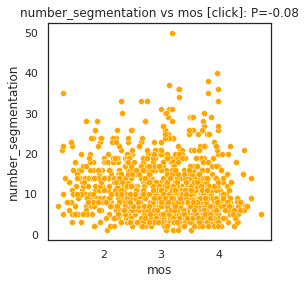

In [32]:

ax = sns.scatterplot(x="mos", y="number_segmentation", data=dm, color="orange")
p = dm[["mos", "number_segmentation"]].corr(method="pearson")["mos"].values[1]
k = dm[["mos", "number_segmentation"]].corr(method="kendall")["mos"].values[1]
s = dm[["mos", "number_segmentation"]].corr(method="spearman")["mos"].values[1]
metrics.append({
    "feature": "number_segmentation",
    "p": p,
    "k": k,
    "s": s
})
save_fig(ax, title="number_segmentation vs mos [click]: P={}".format(p.round(2)), pdfname="number_segmentation_vs_mos_click.pdf")


In [33]:
# sentiment

dsenti = pd.read_csv("visual_sentiment.csv")
dsenti["image"] = dsenti["image"].apply(lambda x: x.replace("../../../images/", "").replace("/images/", "/medium/") )
d(dsenti)

,neg,neu,pos,image
0,0.243627,0.099862,0.656510,500px_cc0/medium/78827175_Mug_of_Cocoa.jpg
1,0.186535,0.308842,0.504624,500px_cc0/medium/162876571_among_the_reeds.jpg
2,0.376438,0.510715,0.112847,500px_cc0/medium/194901225_Frozen_Balaton.jpg
3,0.278239,0.360714,0.361047,500px_cc0/medium/162077443_Sunset.jpg
4,0.094766,0.497986,0.407247,500px_cc0/medium/139228225_Sunset-PicLiberum.c...
...,...,...,...,...
1057,0.153218,0.565396,0.281386,pixabay_first50k/medium/nature-963293.jpg
1058,0.488797,0.318060,0.193143,pixabay_first50k/medium/potion-1249050.jpg
1059,0.062217,0.571392,0.366391,pixabay_first50k/medium/wine-1796891.jpg
1060,0.274270,0.337339,0.388391,pixabay_first50k/medium/waterscape-4208104.jpg


In [34]:
dm = pd.merge(dsenti, dclick, left_on="image", right_on="filename")
d(dm)

,neg,neu,pos,image,filename,std,ci,mos,num_ratings,count_1,count_2,count_3,count_4,count_5
0,0.243627,0.099862,0.656510,500px_cc0/medium/78827175_Mug_of_Cocoa.jpg,500px_cc0/medium/78827175_Mug_of_Cocoa.jpg,1.221739,0.628160,2.647059,17,4,4,3,6,0
1,0.186535,0.308842,0.504624,500px_cc0/medium/162876571_among_the_reeds.jpg,500px_cc0/medium/162876571_among_the_reeds.jpg,0.939336,0.482962,2.588235,17,2,6,6,3,0
2,0.376438,0.510715,0.112847,500px_cc0/medium/194901225_Frozen_Balaton.jpg,500px_cc0/medium/194901225_Frozen_Balaton.jpg,0.875094,0.409557,3.350000,20,0,3,9,6,2
3,0.278239,0.360714,0.361047,500px_cc0/medium/162077443_Sunset.jpg,500px_cc0/medium/162077443_Sunset.jpg,0.783823,0.389786,4.444444,18,0,0,3,4,11
4,0.094766,0.497986,0.407247,500px_cc0/medium/139228225_Sunset-PicLiberum.c...,500px_cc0/medium/139228225_Sunset-PicLiberum.c...,1.184551,0.512238,3.695652,23,2,1,5,9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1053,0.153218,0.565396,0.281386,pixabay_first50k/medium/nature-963293.jpg,pixabay_first50k/medium/nature-963293.jpg,1.166190,0.481380,3.880000,25,1,3,3,9,9
1054,0.488797,0.318060,0.193143,pixabay_first50k/medium/potion-1249050.jpg,pixabay_first50k/medium/potion-1249050.jpg,0.981353,0.373287,3.034483,29,1,8,11,7,2
1055,0.062217,0.571392,0.366391,pixabay_first50k/medium/wine-1796891.jpg,pixabay_first50k/medium/wine-1796891.jpg,1.268798,0.449896,2.878788,33,5,9,8,7,4
1056,0.274270,0.337339,0.388391,pixabay_first50k/medium/waterscape-4208104.jpg,pixabay_first50k/medium/waterscape-4208104.jpg,1.272418,0.493392,3.714286,28,2,3,6,7,10


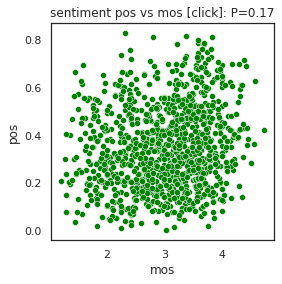

In [35]:

ax = sns.scatterplot(x="mos", y="pos", data=dm, color="green")
p = dm[["mos", "pos"]].corr(method="pearson")["mos"].values[1]
k = dm[["mos", "pos"]].corr(method="kendall")["mos"].values[1]
s = dm[["mos", "pos"]].corr(method="spearman")["mos"].values[1]
metrics.append({
    "feature": "sentiment_pos",
    "p": p,
    "k": k,
    "s": s
})
save_fig(ax, title="sentiment pos vs mos [click]: P={}".format(p.round(2)), pdfname="sentiment_pos_vs_mos_click.pdf")


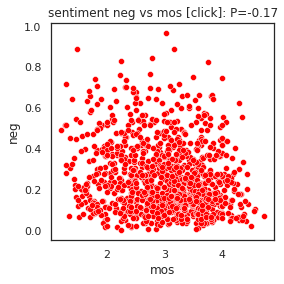

In [36]:
ax = sns.scatterplot(x="mos", y="neg", data=dm, color="red")
p = dm[["mos", "neg"]].corr(method="pearson")["mos"].values[1]
k = dm[["mos", "neg"]].corr(method="kendall")["mos"].values[1]
s = dm[["mos", "neg"]].corr(method="spearman")["mos"].values[1]
metrics.append({
    "feature": "sentiment_neg",
    "p": p,
    "k": k,
    "s": s
})
save_fig(ax, title="sentiment neg vs mos [click]: P={}".format(p.round(2)), pdfname="sentiment_neg_vs_mos_click.pdf")


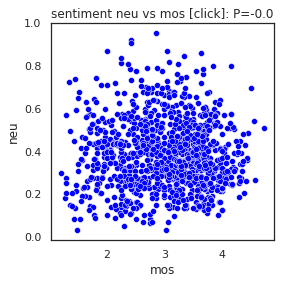

In [37]:
ax = sns.scatterplot(x="mos", y="neu", data=dm, color="blue")
p = dm[["mos", "neu"]].corr(method="pearson")["mos"].values[1]
k = dm[["mos", "neu"]].corr(method="kendall")["mos"].values[1]
s = dm[["mos", "neu"]].corr(method="spearman")["mos"].values[1]
metrics.append({
    "feature": "sentiment_neu",
    "p": p,
    "k": k,
    "s": s
})
save_fig(ax, title="sentiment neu vs mos [click]: P={}".format(p.round(2)), pdfname="sentiment_neu_vs_mos_click.pdf")


In [38]:
dif = pd.read_json("image_features.json")
dif["image"] = dif["image"].apply(lambda x: x.replace("../images/", ""))

dif["mean_dominant_color"] = dif["dominant_color"].apply(lambda x: np.mean(x))

fcols = list(dif.columns.difference(["image" , "niqe", "dominant_color"]))
print(fcols)
d(dif)

['blur', 'blur_stength', 'color_fulness', 'contrast', 'cpbd', 'fft', 'mean_dominant_color', 'noise', 'saturation', 'si', 'tone']


,image,niqe,color_fulness,tone,blur,saturation,fft,si,contrast,noise,dominant_color,cpbd,blur_stength,mean_dominant_color
0,500px_cc0/medium/100327907_some_days_in_winter...,18.261774,99.968566,0.344830,5905.874189,8.090593,55631.212467,0.200445,92.210446,0.827311,"[22, 21, 17]",0.985507,0.218320,20.000000
1,500px_cc0/medium/1003502191_Flat_lay_of_busine...,18.836861,161.123145,0.912394,693674.672539,14.541476,62936.446231,0.664555,87.581326,0.092663,"[176, 191, 199]",0.995358,0.204170,188.666667
2,500px_cc0/medium/1011015162_Anemone-.jpg,20.049458,166.402034,0.564914,49200.989096,27.307151,58041.216191,0.306726,91.414505,0.699920,"[39, 41, 31]",0.864078,0.416225,37.000000
3,500px_cc0/medium/1011015165_Anemone-.jpg,19.260590,166.875180,0.782044,55787.959726,37.136626,56692.475759,0.327116,89.168754,0.784306,"[66, 75, 44]",0.471910,0.441503,61.666667
4,500px_cc0/medium/1011015217_Anemone-.jpg,19.988764,167.111183,0.770272,26675.419004,40.360669,55033.883335,0.245151,88.064807,0.582428,"[64, 72, 42]",0.661922,0.544027,59.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1056,pixabay_first50k/medium/woman-3585065.jpg,19.861084,161.086353,0.645935,12932.847169,21.593980,46619.850075,0.180849,92.515967,0.638145,"[13, 13, 14]",0.968447,0.371423,13.333333
1057,pixabay_first50k/medium/woman-3895501.jpg,20.591862,78.759623,0.595703,1814.972172,25.217813,32743.866533,0.085470,74.967186,0.345822,"[18, 16, 15]",0.846154,0.446154,16.333333
1058,pixabay_first50k/medium/woman-5341680.jpg,21.279207,169.018287,0.289614,15706.530708,19.416003,39179.544630,0.165312,81.821017,0.259218,"[13, 14, 10]",0.412481,0.338003,12.333333
1059,pixabay_first50k/medium/women-1209678.jpg,19.433496,150.702964,0.237571,4192.476556,42.622716,51340.681636,0.141170,91.267357,0.740707,"[17, 39, 44]",0.906404,0.330244,33.333333


In [39]:
dm = pd.merge(dif, dclick, left_on="image", right_on="filename")
d(dm)

,image,niqe,color_fulness,tone,blur,saturation,fft,si,contrast,noise,...,filename,std,ci,mos,num_ratings,count_1,count_2,count_3,count_4,count_5
0,500px_cc0/medium/100327907_some_days_in_winter...,18.261774,99.968566,0.344830,5905.874189,8.090593,55631.212467,0.200445,92.210446,0.827311,...,500px_cc0/medium/100327907_some_days_in_winter...,1.092398,0.450920,2.880000,25,4,3,11,6,1
1,500px_cc0/medium/1003502191_Flat_lay_of_busine...,18.836861,161.123145,0.912394,693674.672539,14.541476,62936.446231,0.664555,87.581326,0.092663,...,500px_cc0/medium/1003502191_Flat_lay_of_busine...,1.099766,0.475575,2.869565,23,2,7,8,4,2
2,500px_cc0/medium/1011015162_Anemone-.jpg,20.049458,166.402034,0.564914,49200.989096,27.307151,58041.216191,0.306726,91.414505,0.699920,...,500px_cc0/medium/1011015162_Anemone-.jpg,0.978093,0.403737,2.960000,25,1,7,11,4,2
3,500px_cc0/medium/1011015165_Anemone-.jpg,19.260590,166.875180,0.782044,55787.959726,37.136626,56692.475759,0.327116,89.168754,0.784306,...,500px_cc0/medium/1011015165_Anemone-.jpg,1.144703,0.427439,2.000000,30,14,6,7,2,1
4,500px_cc0/medium/1011015217_Anemone-.jpg,19.988764,167.111183,0.770272,26675.419004,40.360669,55033.883335,0.245151,88.064807,0.582428,...,500px_cc0/medium/1011015217_Anemone-.jpg,0.888523,0.415842,2.500000,20,2,9,6,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1052,pixabay_first50k/medium/woman-3585065.jpg,19.861084,161.086353,0.645935,12932.847169,21.593980,46619.850075,0.180849,92.515967,0.638145,...,pixabay_first50k/medium/woman-3585065.jpg,1.105013,0.517162,3.800000,20,1,1,5,7,6
1053,pixabay_first50k/medium/woman-3895501.jpg,20.591862,78.759623,0.595703,1814.972172,25.217813,32743.866533,0.085470,74.967186,0.345822,...,pixabay_first50k/medium/woman-3895501.jpg,1.228321,0.592032,2.789474,19,3,5,6,3,2
1054,pixabay_first50k/medium/woman-5341680.jpg,21.279207,169.018287,0.289614,15706.530708,19.416003,39179.544630,0.165312,81.821017,0.259218,...,pixabay_first50k/medium/woman-5341680.jpg,1.114741,0.573147,2.352941,17,4,6,5,1,1
1055,pixabay_first50k/medium/women-1209678.jpg,19.433496,150.702964,0.237571,4192.476556,42.622716,51340.681636,0.141170,91.267357,0.740707,...,pixabay_first50k/medium/women-1209678.jpg,1.063219,0.448958,3.000000,24,2,5,10,5,2


[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725), (0.8666666666666667, 0.5176470588235295, 0.3215686274509804), (0.3333333333333333, 0.6588235294117647, 0.40784313725490196), (0.7686274509803922, 0.3058823529411765, 0.3215686274509804), (0.5058823529411764, 0.4470588235294118, 0.7019607843137254), (0.5764705882352941, 0.47058823529411764, 0.3764705882352941), (0.8549019607843137, 0.5450980392156862, 0.7647058823529411), (0.5490196078431373, 0.5490196078431373, 0.5490196078431373), (0.8, 0.7254901960784313, 0.4549019607843137), (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]
blur


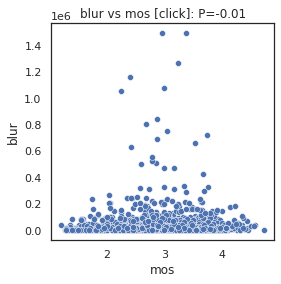

blur_stength


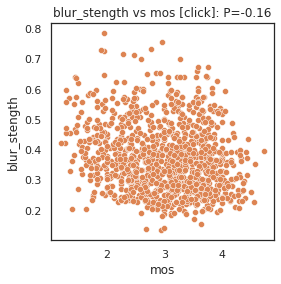

color_fulness


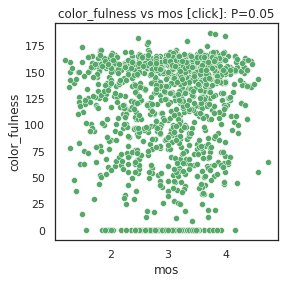

contrast


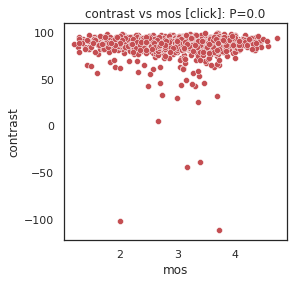

cpbd


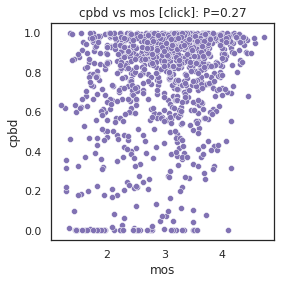

fft


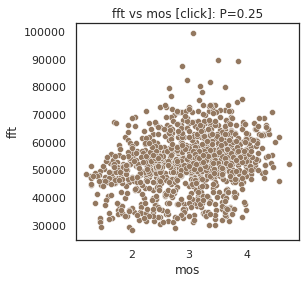

mean_dominant_color


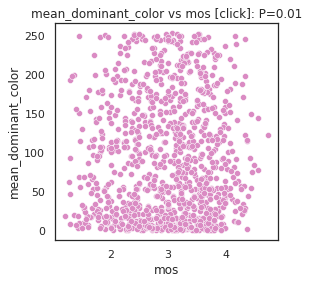

noise


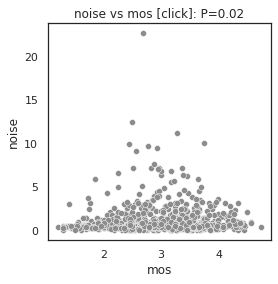

saturation


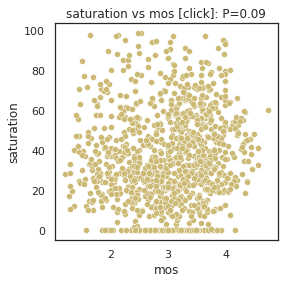

si


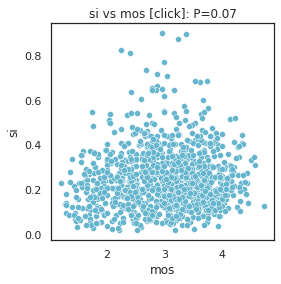

tone


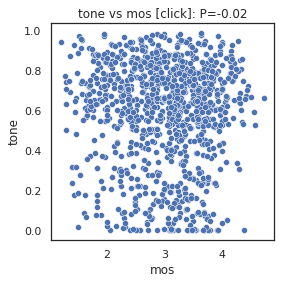

In [40]:
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(4,4)})
sns.set_style("white")

pal = sns.color_palette()

print(pal)
for i, col in enumerate(fcols):
    print(col)
    ax = sns.scatterplot(x="mos", y=col, data=dm, color=pal[i % len(pal)])
    p = dm[["mos", col]].corr(method="pearson")["mos"].values[1]
    k = dm[["mos", col]].corr(method="kendall")["mos"].values[1]
    s = dm[["mos", col]].corr(method="spearman")["mos"].values[1]
    metrics.append({
        "feature": col,
        "p": p,
        "k": k,
        "s": s
    })
    save_fig(ax, title="{} vs mos [click]: P={}".format(col, p.round(2)), pdfname=f"{col}_vs_mos_click.pdf")
    plt.show()

In [41]:
dmetrics = pd.DataFrame(metrics).sort_values(by="p")
d(dmetrics.round(2))


,feature,p,k,s
9,mean_depth,-0.21,-0.14,-0.21
0,niqe,-0.17,-0.12,-0.19
15,sentiment_neg,-0.17,-0.11,-0.16
18,blur_stength,-0.16,-0.09,-0.14
11,mean_segmentation,-0.15,-0.09,-0.13
1,nima_q,-0.09,-0.06,-0.09
12,std_segmentation,-0.09,-0.07,-0.10
13,number_segmentation,-0.08,-0.07,-0.11
5,connected_components_deepgaze,-0.06,-0.05,-0.07
27,tone,-0.02,-0.03,-0.04


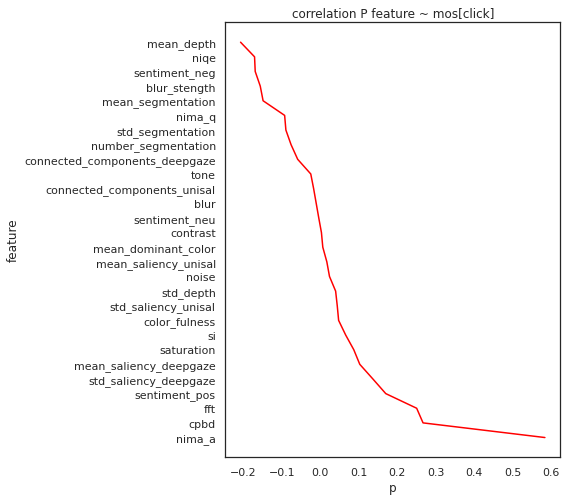

In [42]:
sns.set(rc={'figure.figsize':(6,8)})
sns.set_style("white")

ax = sns.lineplot(x="p", y="feature", data=dmetrics.sort_values(by="p"), color="red")
save_fig(ax, title="correlation P feature ~ mos[click]".format(col, p.round(2)), pdfname=f"corr_p_features_vs_mos_click.pdf")


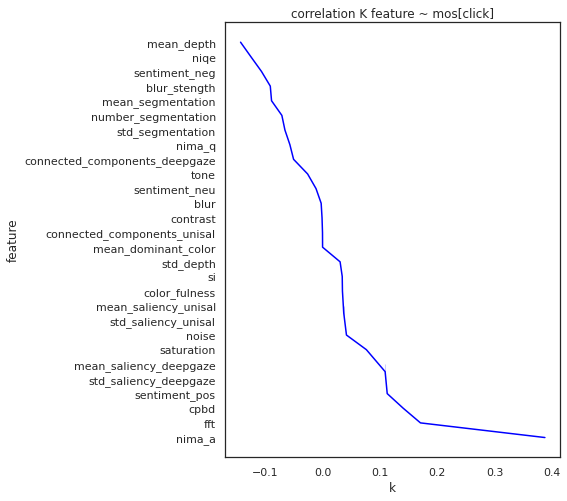

In [43]:

ax = sns.lineplot(x="k", y="feature", data=dmetrics.sort_values(by="k"), color="blue")
save_fig(ax, title="correlation K feature ~ mos[click]".format(col, p.round(2)), pdfname=f"corr_k_features_vs_mos_click.pdf")


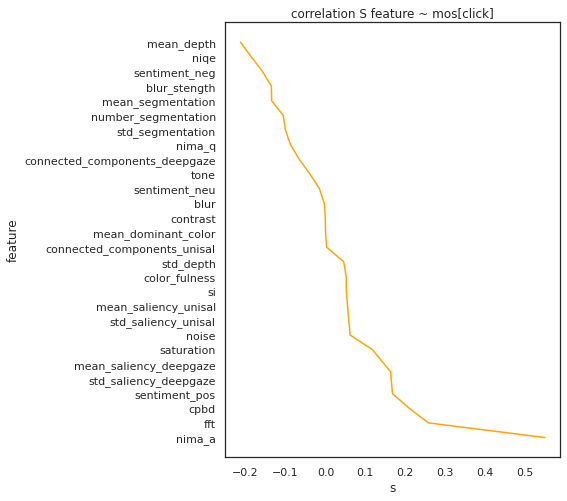

In [44]:
ax = sns.lineplot(x="s", y="feature", data=dmetrics.sort_values(by="s"), color="orange")
save_fig(ax, title="correlation S feature ~ mos[click]".format(col, p.round(2)), pdfname=f"corr_s_features_vs_mos_click.pdf")


In [45]:
d(dm)

,image,niqe,color_fulness,tone,blur,saturation,fft,si,contrast,noise,...,filename,std,ci,mos,num_ratings,count_1,count_2,count_3,count_4,count_5
0,500px_cc0/medium/100327907_some_days_in_winter...,18.261774,99.968566,0.344830,5905.874189,8.090593,55631.212467,0.200445,92.210446,0.827311,...,500px_cc0/medium/100327907_some_days_in_winter...,1.092398,0.450920,2.880000,25,4,3,11,6,1
1,500px_cc0/medium/1003502191_Flat_lay_of_busine...,18.836861,161.123145,0.912394,693674.672539,14.541476,62936.446231,0.664555,87.581326,0.092663,...,500px_cc0/medium/1003502191_Flat_lay_of_busine...,1.099766,0.475575,2.869565,23,2,7,8,4,2
2,500px_cc0/medium/1011015162_Anemone-.jpg,20.049458,166.402034,0.564914,49200.989096,27.307151,58041.216191,0.306726,91.414505,0.699920,...,500px_cc0/medium/1011015162_Anemone-.jpg,0.978093,0.403737,2.960000,25,1,7,11,4,2
3,500px_cc0/medium/1011015165_Anemone-.jpg,19.260590,166.875180,0.782044,55787.959726,37.136626,56692.475759,0.327116,89.168754,0.784306,...,500px_cc0/medium/1011015165_Anemone-.jpg,1.144703,0.427439,2.000000,30,14,6,7,2,1
4,500px_cc0/medium/1011015217_Anemone-.jpg,19.988764,167.111183,0.770272,26675.419004,40.360669,55033.883335,0.245151,88.064807,0.582428,...,500px_cc0/medium/1011015217_Anemone-.jpg,0.888523,0.415842,2.500000,20,2,9,6,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1052,pixabay_first50k/medium/woman-3585065.jpg,19.861084,161.086353,0.645935,12932.847169,21.593980,46619.850075,0.180849,92.515967,0.638145,...,pixabay_first50k/medium/woman-3585065.jpg,1.105013,0.517162,3.800000,20,1,1,5,7,6
1053,pixabay_first50k/medium/woman-3895501.jpg,20.591862,78.759623,0.595703,1814.972172,25.217813,32743.866533,0.085470,74.967186,0.345822,...,pixabay_first50k/medium/woman-3895501.jpg,1.228321,0.592032,2.789474,19,3,5,6,3,2
1054,pixabay_first50k/medium/woman-5341680.jpg,21.279207,169.018287,0.289614,15706.530708,19.416003,39179.544630,0.165312,81.821017,0.259218,...,pixabay_first50k/medium/woman-5341680.jpg,1.114741,0.573147,2.352941,17,4,6,5,1,1
1055,pixabay_first50k/medium/women-1209678.jpg,19.433496,150.702964,0.237571,4192.476556,42.622716,51340.681636,0.141170,91.267357,0.740707,...,pixabay_first50k/medium/women-1209678.jpg,1.063219,0.448958,3.000000,24,2,5,10,5,2


In [46]:
# add additional features
dsimpli = pd.read_json("simplicity.json")
dsimpli["image"] = dsimpli["image"].apply(lambda x: x.replace("../images/", ""))
dsimpli["simplicity"] = dsimpli["prediction"]
dsimpli = dsimpli[["image", "simplicity"]]
d(dsimpli)
dm = pd.merge(dm, dsimpli, left_on="image", right_on="image")
d(dm)

,image,simplicity
0,500px_cc0/medium/78827175_Mug_of_Cocoa.jpg,7.528576e-01
1,500px_cc0/medium/162876571_among_the_reeds.jpg,8.398860e-05
2,500px_cc0/medium/194901225_Frozen_Balaton.jpg,1.581364e-08
3,500px_cc0/medium/162077443_Sunset.jpg,2.959033e-06
4,500px_cc0/medium/139228225_Sunset-PicLiberum.c...,8.918394e-06
...,...,...
1056,pixabay_first50k/medium/nature-963293.jpg,5.627811e-03
1057,pixabay_first50k/medium/potion-1249050.jpg,8.457637e-01
1058,pixabay_first50k/medium/wine-1796891.jpg,1.000000e+00
1059,pixabay_first50k/medium/waterscape-4208104.jpg,3.303930e-02


,image,niqe,color_fulness,tone,blur,saturation,fft,si,contrast,noise,...,std,ci,mos,num_ratings,count_1,count_2,count_3,count_4,count_5,simplicity
0,500px_cc0/medium/100327907_some_days_in_winter...,18.261774,99.968566,0.344830,5905.874189,8.090593,55631.212467,0.200445,92.210446,0.827311,...,1.092398,0.450920,2.880000,25,4,3,11,6,1,0.003234
1,500px_cc0/medium/1003502191_Flat_lay_of_busine...,18.836861,161.123145,0.912394,693674.672539,14.541476,62936.446231,0.664555,87.581326,0.092663,...,1.099766,0.475575,2.869565,23,2,7,8,4,2,0.021080
2,500px_cc0/medium/1011015162_Anemone-.jpg,20.049458,166.402034,0.564914,49200.989096,27.307151,58041.216191,0.306726,91.414505,0.699920,...,0.978093,0.403737,2.960000,25,1,7,11,4,2,0.999999
3,500px_cc0/medium/1011015165_Anemone-.jpg,19.260590,166.875180,0.782044,55787.959726,37.136626,56692.475759,0.327116,89.168754,0.784306,...,1.144703,0.427439,2.000000,30,14,6,7,2,1,0.000011
4,500px_cc0/medium/1011015217_Anemone-.jpg,19.988764,167.111183,0.770272,26675.419004,40.360669,55033.883335,0.245151,88.064807,0.582428,...,0.888523,0.415842,2.500000,20,2,9,6,3,0,0.000001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1052,pixabay_first50k/medium/woman-3585065.jpg,19.861084,161.086353,0.645935,12932.847169,21.593980,46619.850075,0.180849,92.515967,0.638145,...,1.105013,0.517162,3.800000,20,1,1,5,7,6,0.999870
1053,pixabay_first50k/medium/woman-3895501.jpg,20.591862,78.759623,0.595703,1814.972172,25.217813,32743.866533,0.085470,74.967186,0.345822,...,1.228321,0.592032,2.789474,19,3,5,6,3,2,0.999965
1054,pixabay_first50k/medium/woman-5341680.jpg,21.279207,169.018287,0.289614,15706.530708,19.416003,39179.544630,0.165312,81.821017,0.259218,...,1.114741,0.573147,2.352941,17,4,6,5,1,1,0.188155
1055,pixabay_first50k/medium/women-1209678.jpg,19.433496,150.702964,0.237571,4192.476556,42.622716,51340.681636,0.141170,91.267357,0.740707,...,1.063219,0.448958,3.000000,24,2,5,10,5,2,0.995839


In [47]:
drule = pd.read_json("rule_of_thirds.json")
drule["image"] = drule["image"].apply(lambda x: x.replace("../images/", ""))
drule["rule_of_thirds"] = drule["prediction"]
drule = drule[["image", "rule_of_thirds"]]
d(drule)
dm = pd.merge(dm, drule, left_on="image", right_on="image")



,image,rule_of_thirds
0,own/medium/IMG_4480.jpg,9.999990e-01
1,own/medium/IMG_7057.jpg,8.781438e-01
2,own/medium/IMG_6222.jpg,6.935015e-10
3,own/medium/IMG_20190513_210752882.jpg,9.633073e-01
4,own/medium/IMG_20190604_212833103.jpg,6.005168e-04
...,...,...
1056,ava/medium/728541.jpg,3.098488e-03
1057,ava/medium/148871.jpg,2.256501e-09
1058,ava/medium/312526.jpg,2.446496e-02
1059,ava/medium/875370.jpg,9.999996e-01


In [48]:
# add sentiment, saliency depth, and co features to dm, was used before only for one feature at a time

ddeep["deepgaze_connected_components"] = ddeep["connected_components"]
ddeep["deepgaze_mean_saliency"] = ddeep["mean_saliency"]
ddeep["deepgaze_std_saliency"] = ddeep["std_saliency"]
ddeep_tmp = ddeep[["filename", "deepgaze_connected_components", "deepgaze_mean_saliency", "deepgaze_std_saliency"]]

d(ddeep_tmp)
dm = pd.merge(dm, ddeep_tmp, left_on="image", right_on="filename")
d(dm)

,filename,deepgaze_connected_components,deepgaze_mean_saliency,deepgaze_std_saliency
0,500px_cc0/medium/100327907_some_days_in_winter...,3,0.018443,0.134547
1,500px_cc0/medium/1003502191_Flat_lay_of_busine...,2,0.001710,0.041320
2,500px_cc0/medium/1011015162_Anemone-.jpg,2,0.017187,0.129970
3,500px_cc0/medium/1011015165_Anemone-.jpg,2,0.002757,0.052438
4,500px_cc0/medium/1011015217_Anemone-.jpg,2,0.004940,0.070113
...,...,...,...,...
1024,pixabay_first50k/medium/woman-3585065.jpg,2,0.002280,0.047694
1025,pixabay_first50k/medium/woman-3895501.jpg,2,0.007009,0.083425
1026,pixabay_first50k/medium/woman-5341680.jpg,4,0.007843,0.088213
1027,pixabay_first50k/medium/women-1209678.jpg,2,0.002543,0.050365


,image,niqe,color_fulness,tone,blur,saturation,fft,si,contrast,noise,...,count_2,count_3,count_4,count_5,simplicity,rule_of_thirds,filename_y,deepgaze_connected_components,deepgaze_mean_saliency,deepgaze_std_saliency
0,500px_cc0/medium/100327907_some_days_in_winter...,18.261774,99.968566,0.344830,5905.874189,8.090593,55631.212467,0.200445,92.210446,0.827311,...,3,11,6,1,0.003234,1.554927e-02,500px_cc0/medium/100327907_some_days_in_winter...,3,0.018443,0.134547
1,500px_cc0/medium/1003502191_Flat_lay_of_busine...,18.836861,161.123145,0.912394,693674.672539,14.541476,62936.446231,0.664555,87.581326,0.092663,...,7,8,4,2,0.021080,9.999999e-01,500px_cc0/medium/1003502191_Flat_lay_of_busine...,2,0.001710,0.041320
2,500px_cc0/medium/1011015162_Anemone-.jpg,20.049458,166.402034,0.564914,49200.989096,27.307151,58041.216191,0.306726,91.414505,0.699920,...,7,11,4,2,0.999999,1.709759e-04,500px_cc0/medium/1011015162_Anemone-.jpg,2,0.017187,0.129970
3,500px_cc0/medium/1011015165_Anemone-.jpg,19.260590,166.875180,0.782044,55787.959726,37.136626,56692.475759,0.327116,89.168754,0.784306,...,6,7,2,1,0.000011,4.580923e-07,500px_cc0/medium/1011015165_Anemone-.jpg,2,0.002757,0.052438
4,500px_cc0/medium/1011015217_Anemone-.jpg,19.988764,167.111183,0.770272,26675.419004,40.360669,55033.883335,0.245151,88.064807,0.582428,...,9,6,3,0,0.000001,8.597982e-11,500px_cc0/medium/1011015217_Anemone-.jpg,2,0.004940,0.070113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,pixabay_first50k/medium/woman-3585065.jpg,19.861084,161.086353,0.645935,12932.847169,21.593980,46619.850075,0.180849,92.515967,0.638145,...,1,5,7,6,0.999870,6.906875e-07,pixabay_first50k/medium/woman-3585065.jpg,2,0.002280,0.047694
1019,pixabay_first50k/medium/woman-3895501.jpg,20.591862,78.759623,0.595703,1814.972172,25.217813,32743.866533,0.085470,74.967186,0.345822,...,5,6,3,2,0.999965,5.508308e-01,pixabay_first50k/medium/woman-3895501.jpg,2,0.007009,0.083425
1020,pixabay_first50k/medium/woman-5341680.jpg,21.279207,169.018287,0.289614,15706.530708,19.416003,39179.544630,0.165312,81.821017,0.259218,...,6,5,1,1,0.188155,1.017208e-06,pixabay_first50k/medium/woman-5341680.jpg,4,0.007843,0.088213
1021,pixabay_first50k/medium/women-1209678.jpg,19.433496,150.702964,0.237571,4192.476556,42.622716,51340.681636,0.141170,91.267357,0.740707,...,5,10,5,2,0.995839,1.000000e+00,pixabay_first50k/medium/women-1209678.jpg,2,0.002543,0.050365


In [49]:
dunisal["unisalconnected_components"] = dunisal["connected_components"]
dunisal["unisalmean_saliency"] = dunisal["mean_saliency"]
dunisal["unisalstd_saliency"] = dunisal["std_saliency"]
dunisal_tmp = dunisal[["filename", "unisalconnected_components", "unisalmean_saliency", "unisalstd_saliency"]]

d(dunisal_tmp)
dm = pd.merge(dm, dunisal_tmp, left_on="image", right_on="filename")
d(dm)

,filename,unisalconnected_components,unisalmean_saliency,unisalstd_saliency
0,500px_cc0/medium/100327907_some_days_in_winter...,73,0.160042,0.366645
1,500px_cc0/medium/1003502191_Flat_lay_of_busine...,2,0.006744,0.081845
2,500px_cc0/medium/1011015162_Anemone-.jpg,18,0.023652,0.151962
3,500px_cc0/medium/1011015165_Anemone-.jpg,2,0.008461,0.091594
4,500px_cc0/medium/1011015217_Anemone-.jpg,14,0.021157,0.143909
...,...,...,...,...
1056,pixabay_first50k/medium/woman-3585065.jpg,2,0.007547,0.086543
1057,pixabay_first50k/medium/woman-3895501.jpg,3,0.045009,0.207325
1058,pixabay_first50k/medium/woman-5341680.jpg,3,0.015739,0.124462
1059,pixabay_first50k/medium/women-1209678.jpg,3,0.016106,0.125883


,image,niqe,color_fulness,tone,blur,saturation,fft,si,contrast,noise,...,simplicity,rule_of_thirds,filename_y,deepgaze_connected_components,deepgaze_mean_saliency,deepgaze_std_saliency,filename,unisalconnected_components,unisalmean_saliency,unisalstd_saliency
0,500px_cc0/medium/100327907_some_days_in_winter...,18.261774,99.968566,0.344830,5905.874189,8.090593,55631.212467,0.200445,92.210446,0.827311,...,0.003234,1.554927e-02,500px_cc0/medium/100327907_some_days_in_winter...,3,0.018443,0.134547,500px_cc0/medium/100327907_some_days_in_winter...,73,0.160042,0.366645
1,500px_cc0/medium/1003502191_Flat_lay_of_busine...,18.836861,161.123145,0.912394,693674.672539,14.541476,62936.446231,0.664555,87.581326,0.092663,...,0.021080,9.999999e-01,500px_cc0/medium/1003502191_Flat_lay_of_busine...,2,0.001710,0.041320,500px_cc0/medium/1003502191_Flat_lay_of_busine...,2,0.006744,0.081845
2,500px_cc0/medium/1011015162_Anemone-.jpg,20.049458,166.402034,0.564914,49200.989096,27.307151,58041.216191,0.306726,91.414505,0.699920,...,0.999999,1.709759e-04,500px_cc0/medium/1011015162_Anemone-.jpg,2,0.017187,0.129970,500px_cc0/medium/1011015162_Anemone-.jpg,18,0.023652,0.151962
3,500px_cc0/medium/1011015165_Anemone-.jpg,19.260590,166.875180,0.782044,55787.959726,37.136626,56692.475759,0.327116,89.168754,0.784306,...,0.000011,4.580923e-07,500px_cc0/medium/1011015165_Anemone-.jpg,2,0.002757,0.052438,500px_cc0/medium/1011015165_Anemone-.jpg,2,0.008461,0.091594
4,500px_cc0/medium/1011015217_Anemone-.jpg,19.988764,167.111183,0.770272,26675.419004,40.360669,55033.883335,0.245151,88.064807,0.582428,...,0.000001,8.597982e-11,500px_cc0/medium/1011015217_Anemone-.jpg,2,0.004940,0.070113,500px_cc0/medium/1011015217_Anemone-.jpg,14,0.021157,0.143909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,pixabay_first50k/medium/woman-3585065.jpg,19.861084,161.086353,0.645935,12932.847169,21.593980,46619.850075,0.180849,92.515967,0.638145,...,0.999870,6.906875e-07,pixabay_first50k/medium/woman-3585065.jpg,2,0.002280,0.047694,pixabay_first50k/medium/woman-3585065.jpg,2,0.007547,0.086543
1019,pixabay_first50k/medium/woman-3895501.jpg,20.591862,78.759623,0.595703,1814.972172,25.217813,32743.866533,0.085470,74.967186,0.345822,...,0.999965,5.508308e-01,pixabay_first50k/medium/woman-3895501.jpg,2,0.007009,0.083425,pixabay_first50k/medium/woman-3895501.jpg,3,0.045009,0.207325
1020,pixabay_first50k/medium/woman-5341680.jpg,21.279207,169.018287,0.289614,15706.530708,19.416003,39179.544630,0.165312,81.821017,0.259218,...,0.188155,1.017208e-06,pixabay_first50k/medium/woman-5341680.jpg,4,0.007843,0.088213,pixabay_first50k/medium/woman-5341680.jpg,3,0.015739,0.124462
1021,pixabay_first50k/medium/women-1209678.jpg,19.433496,150.702964,0.237571,4192.476556,42.622716,51340.681636,0.141170,91.267357,0.740707,...,0.995839,1.000000e+00,pixabay_first50k/medium/women-1209678.jpg,2,0.002543,0.050365,pixabay_first50k/medium/women-1209678.jpg,3,0.016106,0.125883


In [50]:
dm = pd.merge(dm, dsenti, left_on="image", right_on="image")

In [51]:
dm = dm[dm.columns.difference(["filename_x", "filename_y"])]

In [52]:
ddephts_tmp = ddephts[["mean_depth", "std_depth", "filename"]]

dm = pd.merge(dm, ddephts_tmp, left_on="image", right_on="filename")
d(dm)

,blur,blur_stength,ci,color_fulness,contrast,count_1,count_2,count_3,count_4,count_5,...,si,simplicity,std,tone,unisalconnected_components,unisalmean_saliency,unisalstd_saliency,mean_depth,std_depth,filename_y
0,5905.874189,0.218320,0.450920,99.968566,92.210446,4,3,11,6,1,...,0.200445,0.003234,1.092398,0.344830,73,0.160042,0.366645,36763.688611,18154.203253,500px_cc0/medium/100327907_some_days_in_winter...
1,693674.672539,0.204170,0.475575,161.123145,87.581326,2,7,8,4,2,...,0.664555,0.021080,1.099766,0.912394,2,0.006744,0.081845,25372.601405,17086.128711,500px_cc0/medium/1003502191_Flat_lay_of_busine...
2,49200.989096,0.416225,0.403737,166.402034,91.414505,1,7,11,4,2,...,0.306726,0.999999,0.978093,0.564914,18,0.023652,0.151962,32116.281660,19412.510583,500px_cc0/medium/1011015162_Anemone-.jpg
3,55787.959726,0.441503,0.427439,166.875180,89.168754,14,6,7,2,1,...,0.327116,0.000011,1.144703,0.782044,2,0.008461,0.091594,34076.573541,17195.084243,500px_cc0/medium/1011015165_Anemone-.jpg
4,26675.419004,0.544027,0.415842,167.111183,88.064807,2,9,6,3,0,...,0.245151,0.000001,0.888523,0.770272,14,0.021157,0.143909,30410.322614,16990.384103,500px_cc0/medium/1011015217_Anemone-.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,12932.847169,0.371423,0.517162,161.086353,92.515967,1,1,5,7,6,...,0.180849,0.999870,1.105013,0.645935,2,0.007547,0.086543,26944.590945,20054.103321,pixabay_first50k/medium/woman-3585065.jpg
1019,1814.972172,0.446154,0.592032,78.759623,74.967186,3,5,6,3,2,...,0.085470,0.999965,1.228321,0.595703,3,0.045009,0.207325,31090.973067,16984.042538,pixabay_first50k/medium/woman-3895501.jpg
1020,15706.530708,0.338003,0.573147,169.018287,81.821017,4,6,5,1,1,...,0.165312,0.188155,1.114741,0.289614,3,0.015739,0.124462,28155.522096,18732.643078,pixabay_first50k/medium/woman-5341680.jpg
1021,4192.476556,0.330244,0.448958,150.702964,91.267357,2,5,10,5,2,...,0.141170,0.995839,1.063219,0.237571,3,0.016106,0.125883,23825.702718,21133.509133,pixabay_first50k/medium/women-1209678.jpg


In [53]:
dsegs_tmp = dsegs[["mean_segmentation", "number_segmentation", "std_segmentation", "filename"]]


dm = pd.merge(dm, dsegs_tmp, left_on="image", right_on="filename")
d(dm)

,blur,blur_stength,ci,color_fulness,contrast,count_1,count_2,count_3,count_4,count_5,...,unisalconnected_components,unisalmean_saliency,unisalstd_saliency,mean_depth,std_depth,filename_y,mean_segmentation,number_segmentation,std_segmentation,filename
0,5905.874189,0.218320,0.450920,99.968566,92.210446,4,3,11,6,1,...,73,0.160042,0.366645,36763.688611,18154.203253,500px_cc0/medium/100327907_some_days_in_winter...,2.061414,12,2.220757,500px_cc0/medium/100327907_some_days_in_winter...
1,693674.672539,0.204170,0.475575,161.123145,87.581326,2,7,8,4,2,...,2,0.006744,0.081845,25372.601405,17086.128711,500px_cc0/medium/1003502191_Flat_lay_of_busine...,3.278665,23,4.854167,500px_cc0/medium/1003502191_Flat_lay_of_busine...
2,49200.989096,0.416225,0.403737,166.402034,91.414505,1,7,11,4,2,...,18,0.023652,0.151962,32116.281660,19412.510583,500px_cc0/medium/1011015162_Anemone-.jpg,0.221726,10,0.978827,500px_cc0/medium/1011015162_Anemone-.jpg
3,55787.959726,0.441503,0.427439,166.875180,89.168754,14,6,7,2,1,...,2,0.008461,0.091594,34076.573541,17195.084243,500px_cc0/medium/1011015165_Anemone-.jpg,1.873934,14,2.239667,500px_cc0/medium/1011015165_Anemone-.jpg
4,26675.419004,0.544027,0.415842,167.111183,88.064807,2,9,6,3,0,...,14,0.021157,0.143909,30410.322614,16990.384103,500px_cc0/medium/1011015217_Anemone-.jpg,3.643450,20,4.333476,500px_cc0/medium/1011015217_Anemone-.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,12932.847169,0.371423,0.517162,161.086353,92.515967,1,1,5,7,6,...,2,0.007547,0.086543,26944.590945,20054.103321,pixabay_first50k/medium/woman-3585065.jpg,1.044185,11,1.968715,pixabay_first50k/medium/woman-3585065.jpg
1019,1814.972172,0.446154,0.592032,78.759623,74.967186,3,5,6,3,2,...,3,0.045009,0.207325,31090.973067,16984.042538,pixabay_first50k/medium/woman-3895501.jpg,0.779975,7,0.719633,pixabay_first50k/medium/woman-3895501.jpg
1020,15706.530708,0.338003,0.573147,169.018287,81.821017,4,6,5,1,1,...,3,0.015739,0.124462,28155.522096,18732.643078,pixabay_first50k/medium/woman-5341680.jpg,1.848201,6,1.692414,pixabay_first50k/medium/woman-5341680.jpg
1021,4192.476556,0.330244,0.448958,150.702964,91.267357,2,5,10,5,2,...,3,0.016106,0.125883,23825.702718,21133.509133,pixabay_first50k/medium/women-1209678.jpg,1.323142,8,1.795496,pixabay_first50k/medium/women-1209678.jpg


In [54]:
dm = dm[dm.columns.difference([x for x in dm.columns if "filename_" in x])]
d(dm)


,blur,blur_stength,ci,color_fulness,contrast,count_1,count_2,count_3,count_4,count_5,...,saturation,si,simplicity,std,std_depth,std_segmentation,tone,unisalconnected_components,unisalmean_saliency,unisalstd_saliency
0,5905.874189,0.218320,0.450920,99.968566,92.210446,4,3,11,6,1,...,8.090593,0.200445,0.003234,1.092398,18154.203253,2.220757,0.344830,73,0.160042,0.366645
1,693674.672539,0.204170,0.475575,161.123145,87.581326,2,7,8,4,2,...,14.541476,0.664555,0.021080,1.099766,17086.128711,4.854167,0.912394,2,0.006744,0.081845
2,49200.989096,0.416225,0.403737,166.402034,91.414505,1,7,11,4,2,...,27.307151,0.306726,0.999999,0.978093,19412.510583,0.978827,0.564914,18,0.023652,0.151962
3,55787.959726,0.441503,0.427439,166.875180,89.168754,14,6,7,2,1,...,37.136626,0.327116,0.000011,1.144703,17195.084243,2.239667,0.782044,2,0.008461,0.091594
4,26675.419004,0.544027,0.415842,167.111183,88.064807,2,9,6,3,0,...,40.360669,0.245151,0.000001,0.888523,16990.384103,4.333476,0.770272,14,0.021157,0.143909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,12932.847169,0.371423,0.517162,161.086353,92.515967,1,1,5,7,6,...,21.593980,0.180849,0.999870,1.105013,20054.103321,1.968715,0.645935,2,0.007547,0.086543
1019,1814.972172,0.446154,0.592032,78.759623,74.967186,3,5,6,3,2,...,25.217813,0.085470,0.999965,1.228321,16984.042538,0.719633,0.595703,3,0.045009,0.207325
1020,15706.530708,0.338003,0.573147,169.018287,81.821017,4,6,5,1,1,...,19.416003,0.165312,0.188155,1.114741,18732.643078,1.692414,0.289614,3,0.015739,0.124462
1021,4192.476556,0.330244,0.448958,150.702964,91.267357,2,5,10,5,2,...,42.622716,0.141170,0.995839,1.063219,21133.509133,1.795496,0.237571,3,0.016106,0.125883


In [55]:
dnima_a["nima_a"] = dnima_a["mean_score_prediction"]
dnima_a = dnima_a[["image", "nima_a"]]
d(dnima_a)

,image,nima_a
0,koniq10k/medium/8385411442.jpg,5.756817
1,koniq10k/medium/9625138420.jpg,5.281550
2,koniq10k/medium/2713735764.jpg,4.877974
3,koniq10k/medium/11232665444.jpg,5.413231
4,koniq10k/medium/5409637634.jpg,5.244328
...,...,...
1057,own/medium/IMG_5150.jpg,5.124315
1058,own/medium/IMG_1665.jpg,5.375199
1059,own/medium/IMG_20170907_182814017.jpg,5.741079
1060,own/medium/IMG_4558.jpg,4.840841


In [56]:
dnima_q["nima_q"] = dnima_q["mean_score_prediction"]
dnima_q = dnima_q[["image", "nima_q"]]
d(dnima_q)

,image,nima_q
0,pixabay_first50k/medium/still-life-art-and-lit...,5.201666
1,pixabay_first50k/medium/textures-3668419.jpg,5.092143
2,pixabay_first50k/medium/goose-3190750.jpg,5.255114
3,pixabay_first50k/medium/swan-fight-4066486.jpg,5.195546
4,pixabay_first50k/medium/el-capitan-4933472.jpg,4.831330
...,...,...
1057,koniq10k/medium/1289162225.jpg,4.859053
1058,koniq10k/medium/4551121129.jpg,5.217058
1059,koniq10k/medium/4605755313.jpg,4.330168
1060,koniq10k/medium/4034220859.jpg,5.058482


In [57]:
dm = pd.merge(dnima_a, dm, left_on="image", right_on="image")
d(dm)

,image,nima_a,blur,blur_stength,ci,color_fulness,contrast,count_1,count_2,count_3,...,saturation,si,simplicity,std,std_depth,std_segmentation,tone,unisalconnected_components,unisalmean_saliency,unisalstd_saliency
0,koniq10k/medium/8385411442.jpg,5.756817,14863.543460,0.273312,0.499800,145.791714,82.095889,3,4,5,...,5.122027,0.174566,4.084575e-02,1.288944,8362.178454,1.584552,0.285593,11,0.030963,0.173218
1,koniq10k/medium/9625138420.jpg,5.281550,12301.084338,0.454906,0.379231,155.063863,94.799162,0,2,3,...,49.493538,0.179012,5.887738e-06,0.938903,15830.606657,3.135484,0.566142,10,0.014299,0.118720
2,koniq10k/medium/2713735764.jpg,4.877974,199687.730628,0.358430,0.401794,90.020327,92.864495,6,9,8,...,51.905646,0.454435,2.671450e-03,1.056297,11772.385002,3.903597,0.142930,47,0.098314,0.297739
3,koniq10k/medium/11232665444.jpg,5.413231,474.911472,0.283308,0.359656,52.586940,85.214371,0,5,11,...,97.327778,0.059628,6.357263e-01,0.811177,17380.556192,0.580725,0.018151,53,0.053435,0.224900
4,koniq10k/medium/5409637634.jpg,5.244328,4433.285969,0.329965,0.342728,70.944904,73.266698,0,2,3,...,52.225308,0.127657,7.624522e-01,0.848528,23147.032717,5.286076,0.399982,5,0.021116,0.143771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,own/medium/IMG_5150.jpg,5.124315,32583.059222,0.374024,0.401741,154.472362,88.034773,7,6,7,...,18.344330,0.281535,1.450310e-10,0.858395,10975.772204,3.331195,0.579222,37,0.038460,0.192304
1020,own/medium/IMG_1665.jpg,5.375199,3038.307008,0.419155,0.560689,39.146974,85.979742,1,3,7,...,44.522464,0.094129,2.172117e-06,1.127494,12123.407646,3.710115,0.238750,13,0.087577,0.282679
1021,own/medium/IMG_20170907_182814017.jpg,5.741079,185404.639933,0.234293,0.424671,166.853958,89.684641,3,6,11,...,22.342816,0.456003,6.132327e-01,0.982052,16309.083354,0.522589,0.899178,74,0.168429,0.374246
1022,own/medium/IMG_4558.jpg,4.840841,15390.592852,0.431080,0.355656,153.925302,85.570431,2,8,13,...,44.423021,0.200051,8.945996e-01,0.917208,20658.942631,1.192423,0.448907,41,0.033226,0.179225


In [58]:
dm = pd.merge(dnima_q, dm, left_on="image", right_on="image")
d(dm)

,image,nima_q,nima_a,blur,blur_stength,ci,color_fulness,contrast,count_1,count_2,...,saturation,si,simplicity,std,std_depth,std_segmentation,tone,unisalconnected_components,unisalmean_saliency,unisalstd_saliency
0,pixabay_first50k/medium/still-life-art-and-lit...,5.201666,5.443225,26406.702098,0.327312,0.502772,138.659979,84.181416,2,1,...,45.451583,0.232381,2.163852e-05,1.162660,16945.347024,3.252017,0.759826,6,0.018195,0.133656
1,pixabay_first50k/medium/textures-3668419.jpg,5.092143,5.644749,67384.029520,0.268583,0.513747,104.675082,83.552939,4,7,...,43.201122,0.382488,9.852608e-07,1.298695,16790.058447,0.968191,0.577008,2,0.160672,0.367228
2,pixabay_first50k/medium/goose-3190750.jpg,5.255114,5.531336,48336.483041,0.417756,0.401333,52.028023,80.851269,2,2,...,11.047839,0.255594,9.999940e-01,1.074789,21863.079921,1.287890,0.788853,8,0.030221,0.171194
3,pixabay_first50k/medium/swan-fight-4066486.jpg,5.195546,5.461508,48337.186393,0.439059,0.405074,128.999337,88.055617,0,6,...,15.047624,0.314595,9.974234e-01,0.936734,19387.248858,1.091901,0.610565,2,0.039222,0.194122
4,pixabay_first50k/medium/el-capitan-4933472.jpg,4.831330,5.597155,58812.675989,0.223902,0.429635,153.932848,84.466508,0,3,...,35.516140,0.396389,2.065818e-05,1.040833,12562.584776,0.794549,0.702838,5,0.065129,0.246754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021,koniq10k/medium/1289162225.jpg,4.859053,4.632835,137118.276066,0.299908,0.425412,141.939105,90.390416,6,7,...,7.646802,0.386891,9.142610e-01,1.199747,21645.689315,3.795820,0.641046,7,0.027771,0.164317
1022,koniq10k/medium/4551121129.jpg,5.217058,5.116648,142481.662501,0.277882,0.344962,137.463009,86.373567,1,4,...,39.050476,0.407439,9.633499e-01,0.797724,17954.100246,0.893128,0.762570,17,0.014751,0.120553
1023,koniq10k/medium/4605755313.jpg,4.330168,5.056751,423006.937656,0.238177,0.441372,153.328991,89.459027,0,4,...,9.260073,0.599511,2.755574e-08,1.069268,19269.845387,3.291512,0.499647,67,0.032618,0.177633
1024,koniq10k/medium/4034220859.jpg,5.058482,4.578805,1017.217432,0.461570,0.435794,61.733606,94.065372,8,6,...,88.385312,0.073388,9.997045e-01,1.167077,19121.098945,1.339804,0.432870,2,0.009183,0.095386


In [59]:
dm.to_csv("all_features.csv", index=False)

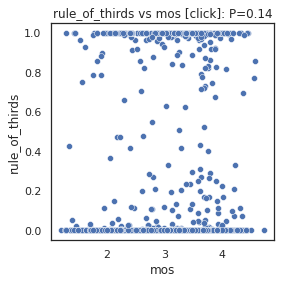

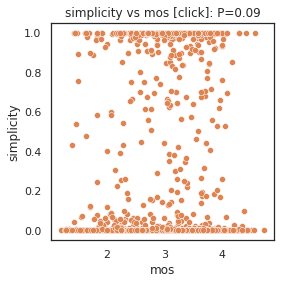

,feature,p,k,s
0,rule_of_thirds,0.137227,0.122547,0.183259
1,simplicity,0.089806,0.046954,0.069092


\begin{tabular}{lrrr}
\toprule
        feature &         p &         k &         s \\
\midrule
 rule\_of\_thirds &  0.137227 &  0.122547 &  0.183259 \\
     simplicity &  0.089806 &  0.046954 &  0.069092 \\
\bottomrule
\end{tabular}



In [60]:
sns.set(rc={'figure.figsize':(4,4)})
sns.set_style("white")

# check correlations with mos
metrics = []
i = 0
for col in ["rule_of_thirds", "simplicity"]:
    ax = sns.scatterplot(x="mos", y=col, data=dm, color=pal[i % len(pal)])
    p = dm[["mos", col]].corr(method="pearson")["mos"].values[1]
    k = dm[["mos", col]].corr(method="kendall")["mos"].values[1]
    s = dm[["mos", col]].corr(method="spearman")["mos"].values[1]
    metrics.append({
        "feature": col,
        "p": p,
        "k": k,
        "s": s
    })
    save_fig(ax, title="{} vs mos [click]: P={}".format(col, p.round(2)), pdfname=f"{col}_vs_mos_click.pdf")
    plt.show()
    i += 1
dmee = pd.DataFrame(metrics)
d(dmee)
print(dmee.to_latex(index=False))